<a href="https://colab.research.google.com/github/YY2mk/KT_aivle/blob/master/DeepLearning/DX_%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B8%B0%EC%B4%88_3%EC%9D%BC%EC%B0%A8%20%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/%EC%B6%94%EA%B0%80%EC%8B%A4%EC%8A%B5_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  추가실습 : CNN Fashion MNIST
* 본 파일은 GPU 런타임으로 연결됩니다.
* 경우에 따라서는 GPU 연결이 원할하지 않을 수도 있습니다.

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![fashion class](https://user-images.githubusercontent.com/60168331/117663987-35e42e00-b1dc-11eb-88c7-64db3b4fbff0.png)

In [3]:
# 케라스 데이터셋으로 부터 fashion_mnist 불러오기
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2 데이터 살펴보기

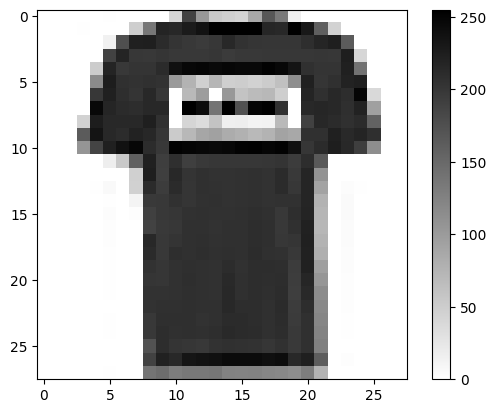

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

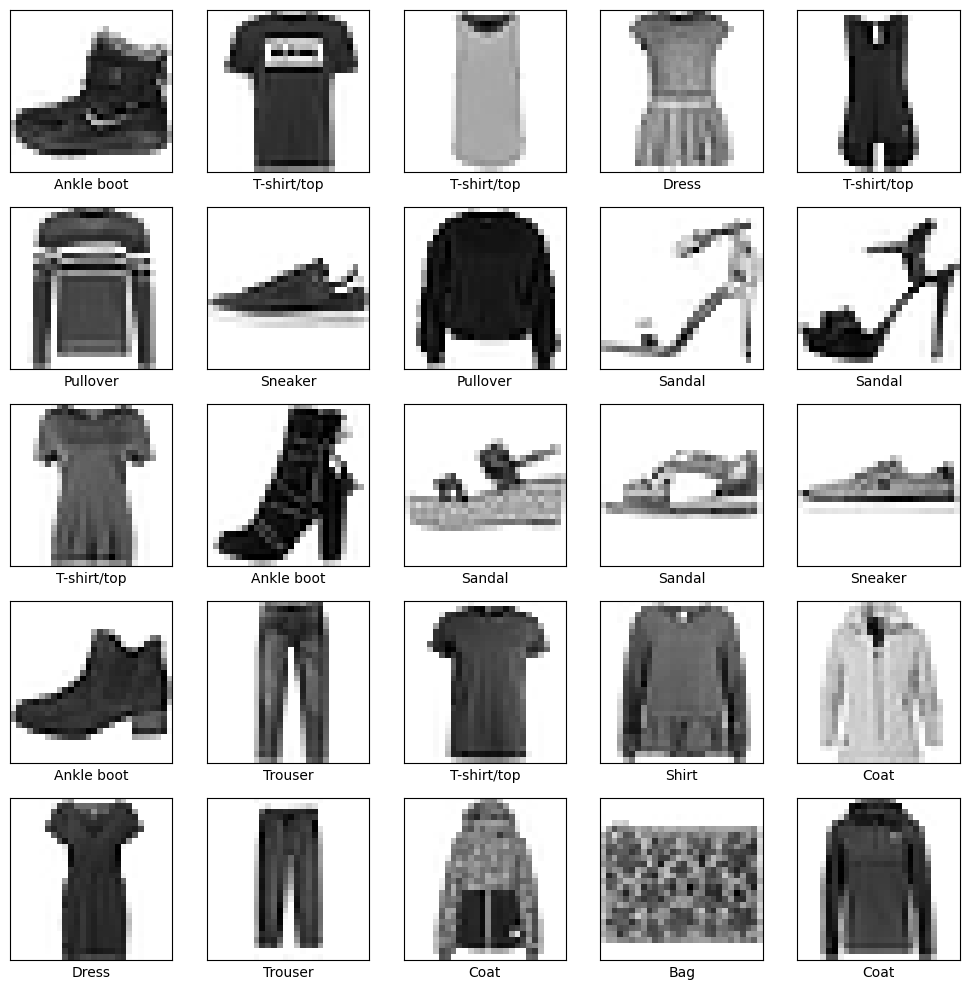

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

* CNN은 3차원 구조의 이미지(데이터셋은 4차원)를 입력해야 합니다.(input_shape)

In [8]:
x_train.shape, x_val.shape

((60000, 28, 28), (10000, 28, 28))

* reshape를 이용하여 다음과 같이 변환해 봅시다.
    * x_train.shape : (60000, 28, 28, 1)
    * x_val.shape : (10000, 28, 28, 1)

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_val = x_val.reshape(10000,28,28,1)

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_test를 그냥 255로 나누면 됨

In [10]:
x_train = x_train / 255.
x_test = x_val / 255.

## 4.CNN 모델링

* 아래 그림의 구조대로 모델을 설계하고 학습해 봅시다.
* learning_rate = 0.0001

![](https://github.com/DA4BAM/image/blob/main/cnn_mnist3.png?raw=true)

In [14]:
clear_session()

model = Sequential([ Conv2D(32 , kernel_size=3, input_shape=(28, 28, 1), padding='same', strides=1, activation='relu'),
                     MaxPooling2D(pool_size=2, strides=2 ),
                     Conv2D(64, kernel_size=3 ,input_shape=(14, 14, 1), padding='same', strides=1, activation='relu'),
                     MaxPooling2D(pool_size=2, strides=2 ),
                     Flatten(),
                     Dense(128, activation='relu'),
                     Dense(10, activation='softmax')  ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 10s 4ms/step - loss: 0.6387 - val_loss: 0.4799
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4276 - val_loss: 0.4192
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3803 - val_loss: 0.3743
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3497 - val_loss: 0.3774
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3272 - val_loss: 0.3353
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3078 - val_loss: 0.3127
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2932 - val_loss: 0.2969
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2800 - val_loss: 0.3064
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2672 - val_loss: 0.2814
Epoch 10/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.25

* 학습결과 그래프

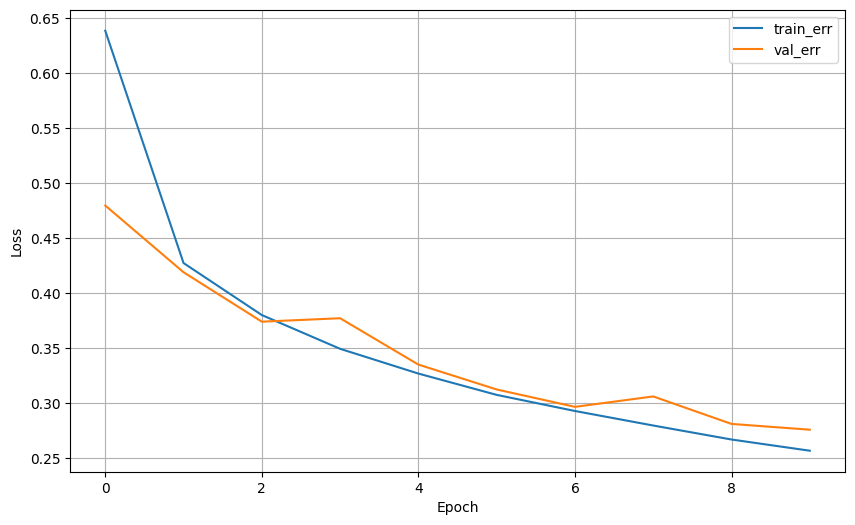

In [16]:
dl_history_plot(history)

* 예측 및 평가

In [17]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [18]:
pred_1 = pred.argmax(axis=1)

In [19]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.8431
------------------------------------------------------------
[[706   8  19   7  41   1 204   0  13   1]
 [  0 985   0   3   8   0   2   0   2   0]
 [  6   2 679   1 253   0  59   0   0   0]
 [ 11  97  12 660 171   0  46   0   3   0]
 [  0   1  16   2 967   0  13   0   1   0]
 [  0   0   0   0   0 971   1  15   1  12]
 [ 53   4  47   7 303   0 577   0   9   0]
 [  0   0   0   0   0  21   0 939   1  39]
 [  2   2   1   0  11   3   1   2 978   0]
 [  0   0   0   0   0   3   1  27   0 969]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1000
           1       0.90      0.98      0.94      1000
           2       0.88      0.68      0.77      1000
           3       0.97      0.66      0.79      1000
           4       0.55      0.97      0.70      1000
           5       0.97      0.97      0.97      1000
           6       0.64      0.58      0.61      1000
       

## 5.틀린그림 찾아보기
위 모델의 결과에서 틀린 그림을 살펴 봅시다.

In [20]:
idx = (y_val != pred_1)
x_val_wr = x_val[idx]
y_val_wr = y_val[idx]
pred_wr = pred_1[idx]

x_val_wr = x_val_wr.reshape(-1,28,28)
print(x_val_wr.shape)

(1569, 28, 28)


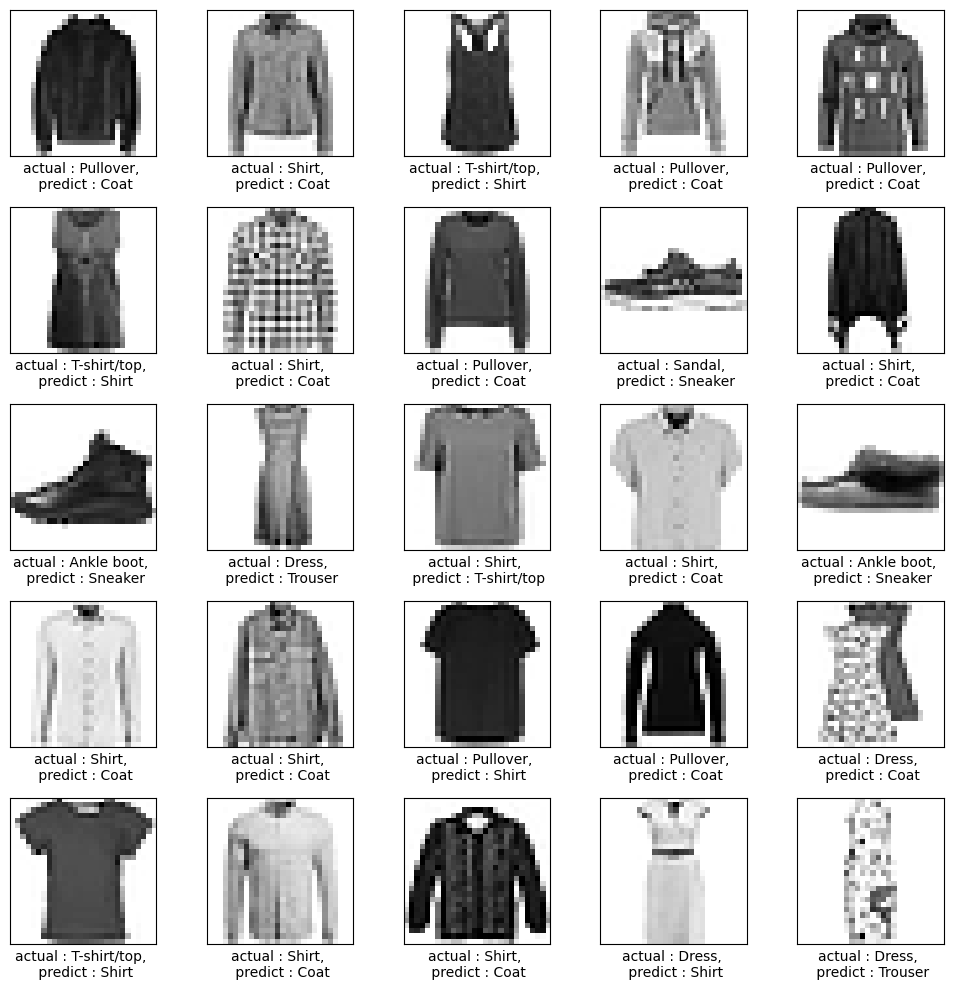

In [21]:
idx = rd.sample(range(x_val_wr.shape[0]),25)
x_temp = x_val_wr[idx]
y_temp = y_val_wr[idx]
p_temp = pred_wr[idx]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_temp[i], cmap=plt.cm.binary)
    plt.xlabel(f'actual : {class_names[y_temp[i]]}, \n predict : {class_names[p_temp[i]]}')
plt.tight_layout()
plt.show()

## 6.손으로 그린 그림으로 예측해 봅시다.

In [22]:
import cv2
from google.colab.patches import cv2_imshow

* 그림판에서 손으로 그린 그림을 업로드 합니다.

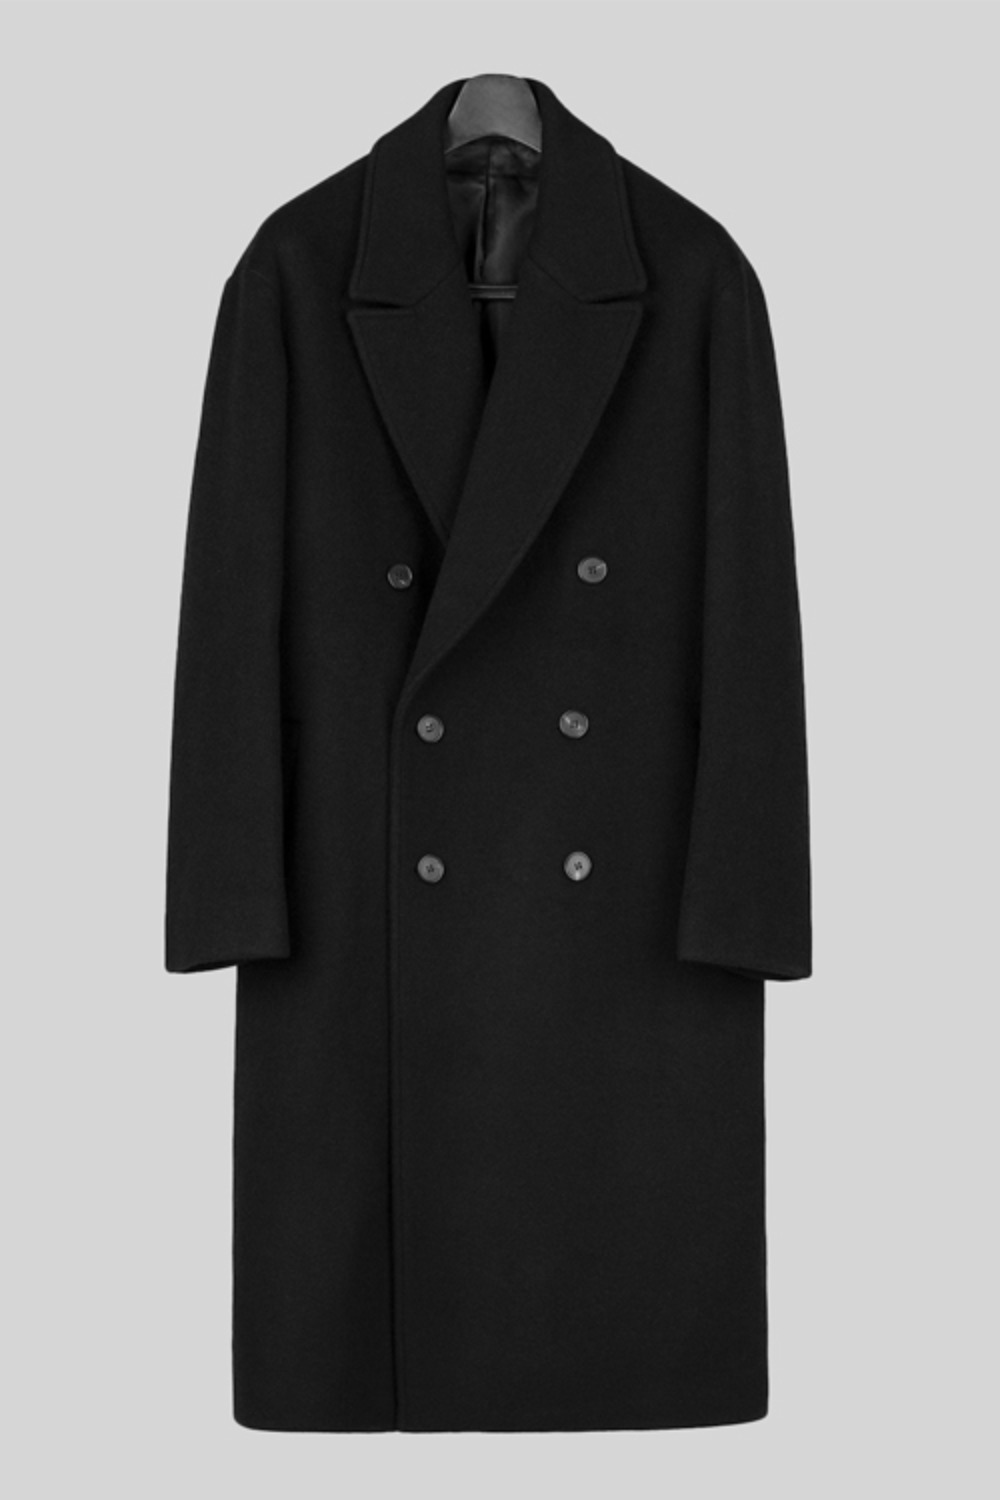

(1500, 1000)


In [26]:
# 파일 열기
img = cv2.imread('coat1.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print(img.shape)

In [27]:
# 크기 조절하기
img = cv2.resize(255-img, (28, 28))
print(img.shape)
cv2_imshow(img)

(28, 28)


In [28]:
test_num = img.reshape(1,28,28,1)
pred = model.predict(test_num)
pred_1 = pred.argmax(axis=1)
print(class_names[pred_1[0]])

1/1 [==============================] - 0s 18ms/step
Coat
